In [ ]:
#Taufik Kurahman Sasmita
#1103200008
#Uas Machine Learning MNIST Fashion With CNN

In [1]:
# mengimpor library tensorflow dengan alias tf.
import tensorflow as tf
# menetapkan dataset Fashion MNIST ke variabel mnist dengan mengakses fashion_mnist dari modul tf.keras.datasets.
mnist = tf.keras.datasets.fashion_mnist
# Memuat dataset Fashion MNIST dan membaginya menjadi set pelatihan dan set pengujian
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Secara keseluruhan, kode ini melakukan hal-hal berikut:

1. Mengimpor library TensorFlow.
2. Mengakses dataset Fashion MNIST dari modul tf.keras.datasets.
3. Memuat dataset tersebut dan membaginya menjadi set pelatihan dan set pengujian.

Fashion MNIST adalah dataset yang terdiri dari gambar-gambar grayscale berukuran 28x28 piksel dari 10 kategori pakaian yang berbeda, seperti sepatu, tas, kemeja, dll. Dataset ini sering digunakan sebagai pengganti dataset MNIST yang berisi angka tulisan tangan untuk tugas-tugas pembelajaran mesin, karena lebih kompleks dan lebih menantang.

In [2]:
# Mencetak bentuk (shape) dari training_images, training_labels, test_images, dan test_labels
print('X_train: ' + str(training_images.shape))
print('Y_train: ' + str(training_labels.shape))
print('X_test: ' + str(test_images.shape))
print('Y_test: ' + str(test_labels.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test: (10000, 28, 28)
Y_test: (10000,)


##**Penjelasan**

1. print('X_train: ' + str(training_images.shape))

* Mencetak dimensi dari training_images, yaitu kumpulan gambar untuk set pelatihan.
* training_images.shape memberikan informasi tentang bentuk array training_images. Dalam kasus Fashion MNIST, ini biasanya (60000, 28, 28), yang berarti terdapat 60.000 gambar, masing-masing berukuran 28x28 piksel.
* Output akan berupa sesuatu seperti: X_train: (60000, 28, 28).

2. print('Y_train: ' + str(training_labels.shape))

* Mencetak dimensi dari training_labels, yaitu kumpulan label untuk set pelatihan.
* training_labels.shape memberikan informasi tentang bentuk array training_labels. Ini biasanya (60000,), yang berarti ada 60.000 label, satu untuk setiap gambar dalam training_images.
* Output akan berupa sesuatu seperti: Y_train: (60000).

3. print('X_test: ' + str(test_images.shape))

* Mencetak dimensi dari test_images, yaitu kumpulan gambar untuk set pengujian.
* test_images.shape memberikan informasi tentang bentuk array test_images. Dalam kasus Fashion MNIST, ini biasanya (10000, 28, 28), yang berarti terdapat 10.000 gambar, masing-masing berukuran 28x28 piksel.
* Output akan berupa sesuatu seperti: X_test: (10000, 28, 28).

4. print('Y_test: ' + str(test_labels.shape))

* Mencetak dimensi dari test_labels, yaitu kumpulan label untuk set pengujian.
* test_labels.shape memberikan informasi tentang bentuk array test_labels. Ini biasanya (10000,), yang berarti ada 10.000 label, satu untuk setiap gambar dalam test_images.
* Output akan berupa sesuatu seperti: Y_test: (10000).

Secara keseluruhan, kode ini digunakan untuk memverifikasi bahwa dataset telah dimuat dengan benar dan untuk memahami struktur data yang akan digunakan dalam model pembelajaran mesin.

In [3]:
# Mengambil 100 data pertama dari set pelatihan dan set pengujian
training_images = training_images[:100]
training_labels = training_labels[:100]

test_images = test_images[:100]
test_labels = test_labels[:100]

##**Penjelasan**

1. training_images = training_images[:100]

* Mengambil 100 gambar pertama dari set pelatihan training_images.
* training_images[:100] berarti mengambil elemen dari indeks 0 sampai 99 (100 elemen pertama).
* Hasilnya, training_images sekarang hanya mengandung 100 gambar pertama dari dataset aslinya.

2. training_labels = training_labels[:100]

* Mengambil 100 label pertama yang sesuai dengan 100 gambar pertama dari set pelatihan training_labels.
* training_labels[:100] berarti mengambil elemen dari indeks 0 sampai 99 (100 elemen pertama).
* Hasilnya, training_labels sekarang hanya mengandung 100 label pertama yang sesuai dengan gambar di training_images.

3. test_images = test_images[:100]

* Mengambil 100 gambar pertama dari set pengujian test_images.
* test_images[:100] berarti mengambil elemen dari indeks 0 sampai 99 (100 elemen pertama).
* Hasilnya, test_images sekarang hanya mengandung 100 gambar pertama dari dataset aslinya.

4. test_labels = test_labels[:100]

* Mengambil 100 label pertama yang sesuai dengan 100 gambar pertama dari set pengujian test_labels.
* test_labels[:100] berarti mengambil elemen dari indeks 0 sampai 99 (100 elemen pertama).
* Hasilnya, test_labels sekarang hanya mengandung 100 label pertama yang sesuai dengan gambar di test_images.

Tujuan dari subset ini biasanya untuk mempercepat proses pelatihan dan pengujian model selama tahap pengembangan dan pengujian awal, karena bekerja dengan dataset yang lebih kecil memerlukan lebih sedikit waktu dan sumber daya komputasi. Setelah model bekerja dengan baik pada subset kecil, dapat diperluas untuk menggunakan dataset penuh.

1
[[  0   0   0   0   0   0   0   0   0   0 175 119 114  86  89  99 109 132   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  92 255 254 255 255 255 255 250 255  19   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 211 234 210 219 220 215 210 206 255 119   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 255 231 224 226 225 223 222 215 237 204   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  50 255 221 228 227 227 224 224 222 221 251   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 135 255 221 229 229 228 226 228 226 218 255  78   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 180 245 222 227 228 228 227 225 224 220 252 106   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 204 232 221 224 225 226 226 224 224 217 247 124   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 208 233 222 226 225 231 231 226 225 221 244 

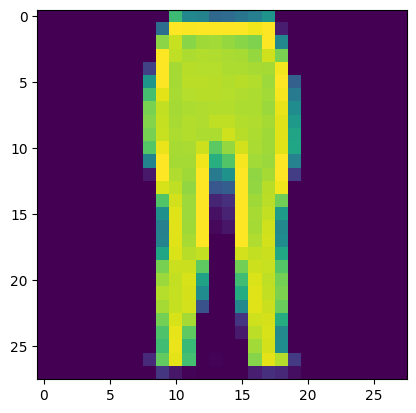

In [4]:
# Mengimpor library numpy dan mengatur opsi tampilan
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
idx_data = 80 # Ganti sesuai indeks yang kita inginkan
plt.imshow(training_images[idx_data])
print(training_labels[idx_data])
print(training_images[idx_data])

* idx_data = 80: Menetapkan nilai 80 ke variabel idx_data. Ini adalah indeks dari gambar yang ingin kita lihat dari dataset pelatihan.
* plt.imshow(training_images[idx_data]): Menampilkan gambar dari training_images pada indeks yang ditentukan (idx_data) menggunakan Matplotlib. Gambar akan ditampilkan dalam bentuk grafis.
* print(training_labels[idx_data]): Mencetak label yang sesuai dengan gambar pada indeks idx_data. Label ini menunjukkan kategori pakaian dari gambar tersebut.
* print(training_images[idx_data]): Mencetak nilai piksel dari gambar pada indeks idx_data. Ini akan menampilkan array 2D yang mewakili intensitas piksel dari gambar tersebut.

Secara keseluruhan, kode ini bertujuan untuk:

* Mengimpor library yang diperlukan.
* Mengatur opsi tampilan untuk array numpy.
* Menampilkan salah satu gambar dari dataset pelatihan.
* Mencetak label dan nilai piksel dari gambar tersebut.

Ini membantu dalam memvisualisasikan data dan memverifikasi bahwa data telah dimuat dan diproses dengan benar.

###**Model CNN**

Epoch 1/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.4385 - accuracy: 0.8421 - val_loss: 0.3430 - val_accuracy: 0.8731
Epoch 2/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.2971 - accuracy: 0.8898 - val_loss: 0.3010 - val_accuracy: 0.8909
Epoch 3/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.2517 - accuracy: 0.9066 - val_loss: 0.2661 - val_accuracy: 0.9008
Epoch 4/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2206 - accuracy: 0.9174 - val_loss: 0.2641 - val_accuracy: 0.9020
Epoch 5/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1948 - accuracy: 0.9269 - val_loss: 0.2559 - val_accuracy: 0.9083
Epoch 6/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.1704 - accuracy: 0.9364 - val_loss: 0.2399 - val_accuracy: 0.9115
Epoch 7/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.1520 - accuracy: 0.9430 - val_loss: 0.2452 -

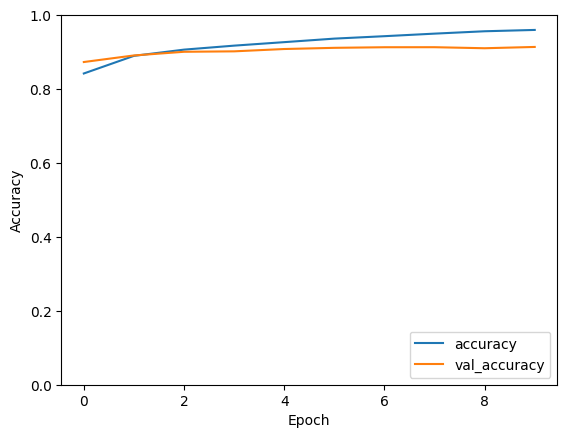

In [5]:
# Membuat grafik akurasi pelatihan dan validasi dari riwayat pelatihan model menggunakan TensorFlow dan Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# Load dataset
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess dataset
training_images = training_images.reshape((training_images.shape[0], 28, 28, 1)) / 255.0
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)) / 255.0

# Define model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Convolutional layer dengan 32 filter 3x3 dan ReLU activation
    MaxPooling2D((2, 2)),  # Max pooling layer dengan filter 2x2
    Conv2D(64, (3, 3), activation='relu'),  # Convolutional layer dengan 64 filter 3x3 dan ReLU activation
    MaxPooling2D((2, 2)),  # Max pooling layer dengan filter 2x2
    Flatten(),  # Meratakan output dari lapisan sebelumnya menjadi vektor
    Dense(128, activation='relu'),  # Fully connected layer dengan 128 unit dan ReLU activation
    Dense(10, activation='softmax')  # Output layer dengan 10 unit untuk klasifikasi 10 kategori dan softmax activation
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(training_images, training_labels, epochs=10, validation_data=(test_images, test_labels))

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')  # Akurasi pelatihan
plt.plot(history.history['val_accuracy'], label='val_accuracy')  # Akurasi validasi
plt.xlabel('Epoch')  # Label sumbu X
plt.ylabel('Accuracy')  # Label sumbu Y
plt.ylim([0, 1])  # Rentang sumbu Y dari 0 hingga 1
plt.legend(loc='lower right')  # Menampilkan legenda di sudut kanan bawah grafik
plt.show()  # Menampilkan grafik


Model Convolutional Neural Network (CNN) sangat cocok untuk dataset Fashion MNIST karena:

1. Pengenalan Gambar: CNN mampu mengekstrak fitur-fitur penting dari gambar pakaian seperti pola, tekstur, dan bentuk, berkat lapisan konvolusi dan pooling-nya.

1. Pengurangan Dimensi: Lapisan max pooling membantu mengurangi dimensi gambar sambil mempertahankan informasi penting, memungkinkan model untuk fokus pada fitur-fitur yang relevan.

1. Klasifikasi Efisien: Dengan lapisan Dense dan softmax, CNN dapat mengklasifikasikan gambar ke dalam 10 kategori pakaian secara efisien berdasarkan fitur-fitur yang dipelajari.

1. Performa Tinggi: CNN telah terbukti memberikan akurasi yang tinggi dalam klasifikasi gambar, menjadikannya pilihan yang ideal untuk tugas-tugas seperti pengenalan pola pada dataset Fashion MNIST.